In [ ]:
import networkx as nx
from matplotlib import pyplot as plt

: 

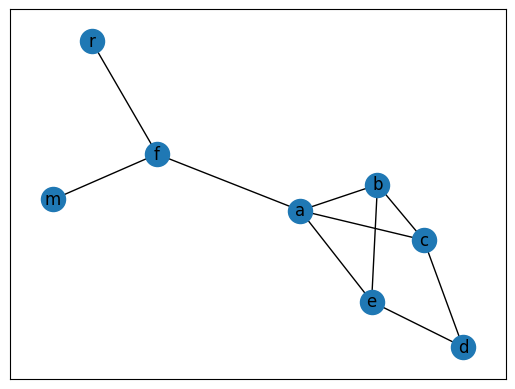

In [20]:
g = nx.Graph()
g.add_edges_from(['ab', 'bc', 'cd', 'ac', 'de', 'be', 'ea', 'af', 'fr', 'fm'])

nx.draw_networkx(g)
plt.show()

In [21]:
dfs_edges = list(nx.traversal.dfs_edges(g, 'a'))

{('a', 'b'): Text(-0.08148787178625505, -0.25155996936102043, '0'),
 ('b', 'c'): Text(-0.07271147626525876, -0.5317819879123928, '1'),
 ('c', 'd'): Text(0.17724006799751602, -0.7628865298100072, '2'),
 ('d', 'e'): Text(0.30004361985804695, -0.66294989026811, '3'),
 ('a', 'f'): Text(-0.05951890525716397, 0.23898578396172487, '4'),
 ('f', 'r'): Text(0.0037693222187701325, 0.7835592023727358, '5'),
 ('f', 'm'): Text(-0.28027652957831556, 0.7392992647516925, '6')}

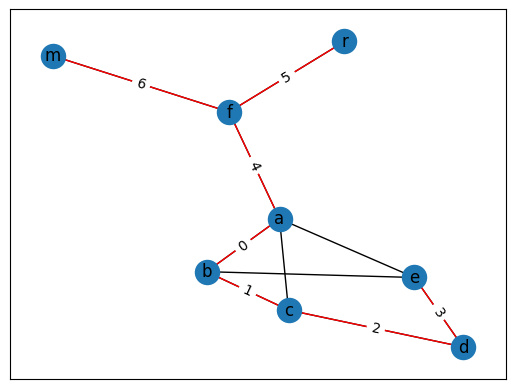

In [25]:
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g.nodes, pos)
nx.draw_networkx_edges(g, pos, g.edges)
nx.draw_networkx_edges(g, pos, dfs_edges, edge_color='red')
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edge_labels(g, pos, {e: i for i, e in enumerate(dfs_edges)})

In [26]:
dfs_tree = nx.dfs_tree(g, 'a')

{('a', 'b'): Text(-0.08148787178625505, -0.25155996936102043, '0'),
 ('a', 'f'): Text(-0.05951890525716397, 0.23898578396172487, '1'),
 ('b', 'c'): Text(-0.07271147626525876, -0.5317819879123928, '2'),
 ('c', 'd'): Text(0.17724006799751602, -0.7628865298100072, '3'),
 ('d', 'e'): Text(0.30004361985804695, -0.66294989026811, '4'),
 ('f', 'r'): Text(0.0037693222187701325, 0.7835592023727358, '5'),
 ('f', 'm'): Text(-0.28027652957831556, 0.7392992647516925, '6')}

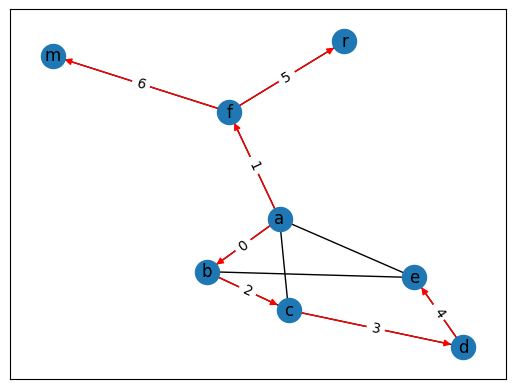

In [36]:
nx.draw_networkx_nodes(g.nodes, pos)
nx.draw_networkx_edges(g, pos, g.edges)
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(dfs_tree, pos, dfs_tree.edges, edge_color='red')
nx.draw_networkx_edge_labels(g, pos, {e: i for i, e in enumerate(dfs_tree.edges)})

In [ ]:
labeled_edges = list(nx.dfs_labeled_edges(g, source='a'))

tree_edges = [(u, v) for u, v, d in labeled_edges if d == 'tree']
forward_edges = [(u, v) for u, v, d in labeled_edges if d == 'forward']
back_edges = [(u, v) for u, v, d in labeled_edges if d == 'reverse']
cross_edges = [(u, v) for u, v, d in labeled_edges if d == 'cross']
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, edgelist=g.edges, alpha=0.3)
nx.draw_networkx_labels(g, pos)

# nx.draw_networkx_edges(g, pos, edgelist=tree_edges, edge_color='green', label='Tree edges')
nx.draw_networkx_edges(g, pos, edgelist=forward_edges, edge_color='blue', label='Forward edges')
# nx.draw_networkx_edges(g, pos, edgelist=back_edges, edge_color='red', label='Back edges')
# nx.draw_networkx_edges(g, pos, edgelist=cross_edges, edge_color='purple', label='Cross edges')

plt.legend()
plt.show()

In [41]:
di_grph = nx.DiGraph()
di_grph.add_edges_from(labeled_edges)

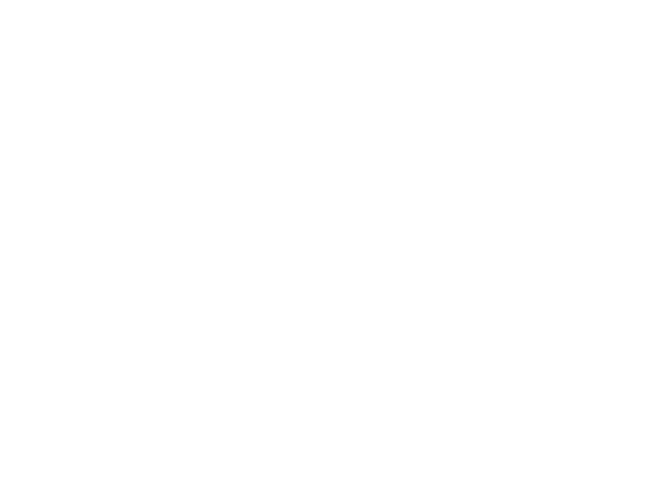

In [ ]:
components = {n:-1 for n in g.nodes}

cnt = 0
for n, c in components.items():
  if c == -1:
    dfs_edges = list(nx.dfs_edges(g, n))
    
    for u, v in dfs_edges:
      components[u] = components[v] = cnt

    cnt += 1

print(components)

colors = [components[n] for n in g.nodes]
nx.draw_networkx_nodes(g, pos, node_color=colors, cmap=plt.cm.rainbow)
nx.draw_networkx_edges(g, pos, edgelist=g.edges)
nx.draw_networkx_labels(g, pos)
plt.show()

In [ ]:
discovery_time = {node: idx for idx, node in enumerate(nx.dfs_preorder_nodes(g, source='a'))}
finishing_time = {node: idx for idx, node in enumerate(nx.dfs_postorder_nodes(g, source='a'))}

print("Discovery Time:", discovery_time)
print("Finishing Time:", finishing_time)